# AIM OF THE NOTEBOOK

This notenook extracts the basic characteristics of each dataset analyzed in Marco Salas et al. 2024, extracting the data presented in Figure 1B.

# Import packages

In [148]:
import xb as xb
import scanpy as sc
import os
import pandas as pd
from anndata import AnnData
import numpy as np
import xb.formatting as xf
import seaborn as sns
import random 
import matplotlib.pyplot as plt
import matplotlib

# Read unprocessed data

First, we extract the list of adata files (unprocessed) for all experiments and we  extract its main characteristics, storing them as csv

In [149]:
maindir='../../data/unprocessed_adata'
files=os.listdir(maindir)

In [64]:
files=['hbreast_idc_addon_set1.h5ad','hbreast_idc_addon_set2.h5ad', 'hbreast_idc_addon_set4.h5ad','hbreast_idc_entiresample_set3.h5ad', 'hbreast_ilc_addon_set2.h5ad',
 'hbreast_ilc_addon_set4.h5ad', 'hbreast_ilc_entiresample_set3.h5ad','healthy_lung.h5ad','human_alzheimers.h5ad', 'human_brain.h5ad', 'human_gbm.h5ad',
 'h_breast_1.h5ad', 'h_breast_2.h5ad', 'lung_cancer.h5ad', 'ms_brain_fullcoronal.h5ad', 'ms_brain_multisection1.h5ad',
 'ms_brain_multisection2.h5ad', 'ms_brain_multisection3.h5ad', 'ms_brain_partialcoronal.h5ad', 'ms_brain_rep1.h5ad',
 'ms_brain_rep2.h5ad', 'ms_brain_rep3.h5ad', 'realmouse_1.h5ad', 'realmouse_2.h5ad', 'realmouse_3.h5ad', 'realmouse_4.h5ad']

In [151]:
allt=[]
for fl in files:
    print(fl)
    adata=sc.read(maindir+'/'+fl)
    print(adata.shape)
    adata=adata[:,adata.var['in_panel'].isin(['gene',True])]
    adata.layers['lognorm']=adata.X
    adata.layers['raw']=adata.X
    adata.uns['spots']['x']=adata.uns['spots']['x_location']
    adata.uns['spots']['y']=adata.uns['spots']['y_location']
    adata.obs['x']=list(adata.obs['x_centroid'])
    adata.obs['y']=list(adata.obs['y_centroid'])
    try:
        adata.layers['raw']=adata.layers['raw'].todense()
    except:
        print('not possible to convert to dense')
    qlm1=xb._combined.all_quality_metrics(adata)
    qlm1.columns=[fl[:-5]]
    qlm1.loc['area',fl[:-5]]=float(xf.cell_area(adata))
    try:
        qlm1.loc['median_genexcell',:]=np.mean(qlm1.loc['median_genexcell',:][0][0][0][0])
    except:
        print('not possible to recover mediangenexcell')
    try:
        qlm1.loc['median_readsxcell',:]=np.mean(qlm1.loc['median_readsxcell',:][0][0][0][0])
    except:
        print('not possible to recover medianreadxcell')
    qlm1.loc['reads_prop_qv>20',fl[:-5]]=np.sum(adata.uns['spots'].loc[:,'qv']>20)/adata.uns['spots'].shape[0]
    qlm1.loc['total_reads',fl[:-5]]=adata.uns['spots'].shape[0]
    qlm1.loc['prop_reads_in_panel',fl[:-5]]=np.sum(adata.uns['spots']['feature_name'].isin(adata.var.loc[adata.var['in_panel'].isin(['gene',True]),'gene_id']))/adata.uns['spots'].shape[0]
    qlm1.loc['prop_reads_assigned_to_cells',fl[:-5]]=int(np.sum(adata.X))/np.sum(adata.uns['spots']['feature_name'].isin(adata.var.loc[adata.var['in_panel'].isin(['gene',True]),'gene_id']))
    print(qlm1.loc['prop_reads_assigned_to_cells',fl[:-5]])
    qlm1.loc['proportion_cells>10reads',fl[:-5]]=np.sum((np.sum(adata.X,axis=1)>5))/adata.shape[0]
    qlm1.to_csv('../../figures/tables/stats_'+fl[:-5]+'.csv')
 
    allt.append(qlm1)

hbreast_idc_addon_set1.h5ad
(576963, 541)
0.7731914958449898


# Read and combine the output

Finally, we combine all outputs into a single table

In [153]:
files=[ 'stats_hbreast_idc_addon_set1.csv', 'stats_hbreast_idc_addon_set2.csv', 'stats_hbreast_idc_addon_set4.csv', 'stats_hbreast_idc_entiresample_set3.csv', 'stats_hbreast_ilc_addon_set2.csv',
 'stats_hbreast_ilc_addon_set4.csv', 'stats_hbreast_ilc_entiresample_set3.csv', 'stats_healthy_lung.csv', 'stats_human_alzheimers.csv', 'stats_human_brain.csv', 'stats_h_breast_1.csv',
 'stats_h_breast_2.csv', 'stats_lung_cancer.csv', 'stats_ms_brain_fullcoronal.csv', 'stats_ms_brain_multisection1.csv', 'stats_ms_brain_multisection2.csv',
 'stats_ms_brain_multisection3.csv', 'stats_ms_brain_partialcoronal.csv','stats_realmouse_1.csv','stats_realmouse_2.csv','stats_realmouse_3.csv',
 'stats_realmouse_4.csv','stats_human_gbm.csv','stats_human_spinal_chord_active.csv', 'stats_human_spinal_chord_inactive.csv']

In [154]:
allt=[]
for fl in files:
    print(fl)
    qlm1=pd.read_csv('../../figures/tables/'+fl[:],index_col=0)
    allt.append(qlm1)
out=pd.concat(allt,axis=1)
out.to_csv(r'../../figures/tables/supp1_raw_information_revision.csv')

stats_hbreast_idc_addon_set1.csv
stats_hbreast_idc_addon_set2.csv
stats_hbreast_idc_addon_set4.csv
stats_hbreast_idc_entiresample_set3.csv
stats_hbreast_ilc_addon_set2.csv
stats_hbreast_ilc_addon_set4.csv
stats_hbreast_ilc_entiresample_set3.csv
stats_healthy_lung.csv
stats_human_alzheimers.csv
stats_human_brain.csv
stats_h_breast_1.csv
stats_h_breast_2.csv
stats_lung_cancer.csv
stats_ms_brain_fullcoronal.csv
stats_ms_brain_multisection1.csv
stats_ms_brain_multisection2.csv
stats_ms_brain_multisection3.csv
stats_ms_brain_partialcoronal.csv
stats_realmouse_1.csv
stats_realmouse_2.csv
stats_realmouse_3.csv
stats_realmouse_4.csv
stats_human_gbm.csv
stats_human_spinal_chord_active.csv
stats_human_spinal_chord_inactive.csv


# Plotting for Figure 1B

The plot we illustrate in Marco salas et al. 2024 is composed by multiple heatmaps. To generate individual heatmaps based on the data we first decide merge datasets that are obtained from the same experiment. For this, we will use the following dictionary, which indicates datasets that correspond to the same batch

In [157]:
dic={'hbreast_idc_addon_set4':12, 'hbreast_ilc_addon_set4':12,'hbreast_idc_addon_set2':9,'hbreast_ilc_addon_set2':9,'hbreast_idc_entiresample_set3':10,'hbreast_ilc_entiresample_set3':10,
     'hbreast_idc_addon_set1':8 , 'healthy_lung':3, 'human_alzheimers':7,'human_brain':6, 'h_breast_1':11, 'h_breast_2':11, 'lung_cancer':4,
'ms_brain_fullcoronal':2, 'ms_brain_multisection1':1,'ms_brain_multisection2':1, 'ms_brain_multisection3':1, 'ms_brain_partialcoronal':2, 'realmouse_1':14, 'realmouse_2':14, 'realmouse_3':14,'human_spinal_chord_active':13,
       'human_spinal_chord_inactive':13, 'realmouse_4':14, 'human_gbm':5}


Then, we just plot it and stored, if required it

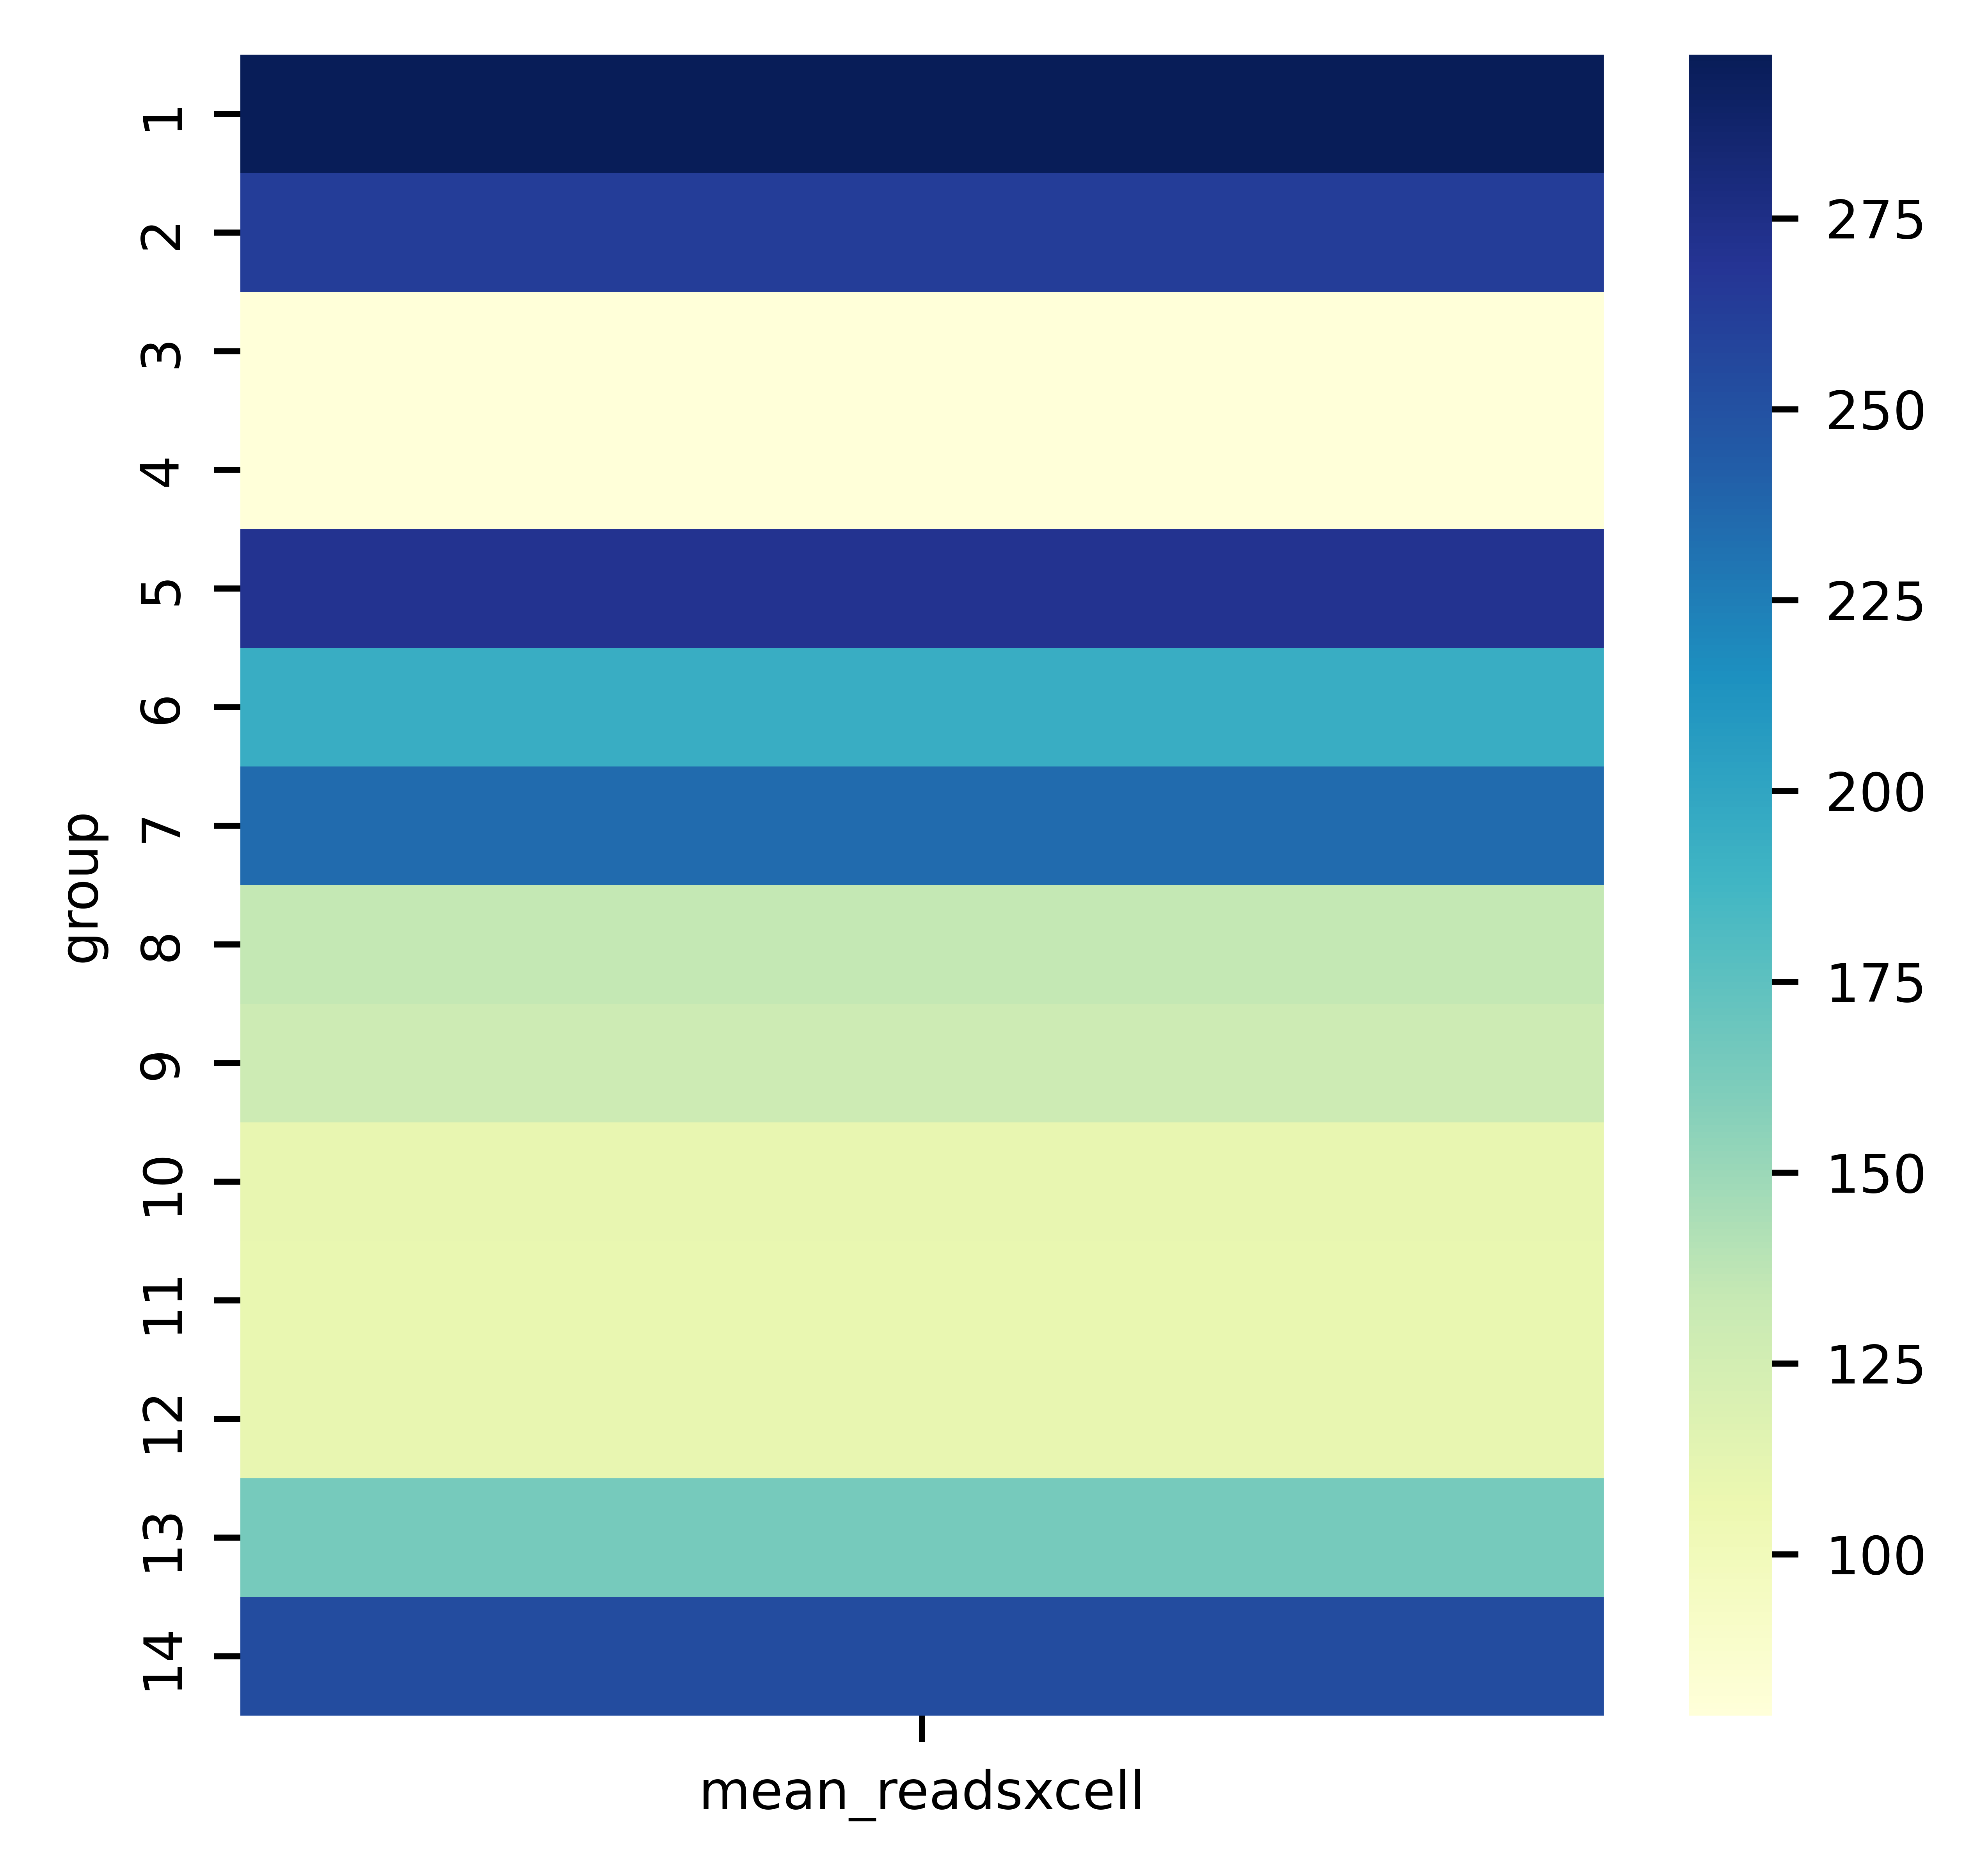

In [193]:
subset=out.loc[['reads_prop_qv>20'],:].transpose()
subset['group']=subset.index.map(dic)
subp=subset.groupby('group').mean()
sc.set_figure_params(scanpy=True, dpi=700, dpi_save=700, frameon=False, vector_friendly=True, fontsize=7, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.heatmap(subp,cmap='YlGnBu')
#plt.savefig('/media/sergio/xenium_b_and_heart/Xenium_benchmarking-main/figures/heatmaps_for_dataset_statistics_panel/reads_prop_qv_20.pdf')